# Exploratory Data Analysis - Moritz 
___

## Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import windrose as wr
from sklearn.preprocessing import MinMaxScaler


import plotly.express as px

import matplotlib.cm as cm
import matplotlib.ticker as ticker

/Users/msp/neuefische/Capstone_WindPowerPredicting/.venv/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Import Data

In [2]:
df = pd.read_csv('../data/GEFCom2014Data/Wind/raw_data.csv')
df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100
0,1,20120101 1:00,0.000000,2.124600,-2.681966,2.864280,-3.666076
1,1,20120101 2:00,0.054879,2.521695,-1.796960,3.344859,-2.464761
2,1,20120101 3:00,0.110234,2.672210,-0.822516,3.508448,-1.214093
3,1,20120101 4:00,0.165116,2.457504,-0.143642,3.215233,-0.355546
4,1,20120101 5:00,0.156940,2.245898,0.389576,2.957678,0.332701


## Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175440 entries, 0 to 175439
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ZONEID     175440 non-null  int64  
 1   TIMESTAMP  175440 non-null  object 
 2   TARGETVAR  175265 non-null  float64
 3   U10        175440 non-null  float64
 4   V10        175440 non-null  float64
 5   U100       175440 non-null  float64
 6   V100       175440 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 9.4+ MB


In [4]:
# Cast TIMESTAMP to be of pandas datetime format
df.TIMESTAMP = pd.to_datetime(df.TIMESTAMP)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175440 entries, 0 to 175439
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ZONEID     175440 non-null  int64         
 1   TIMESTAMP  175440 non-null  datetime64[ns]
 2   TARGETVAR  175265 non-null  float64       
 3   U10        175440 non-null  float64       
 4   V10        175440 non-null  float64       
 5   U100       175440 non-null  float64       
 6   V100       175440 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 9.4 MB


In [5]:
df.describe()

,ZONEID,TARGETVAR,U10,V10,U100,V100
count,175440.00000,175265.000000,175440.000000,175440.000000,175440.000000,175440.000000
mean,5.50000,0.358588,0.818499,0.120835,1.272769,0.058513
std,2.87229,0.310085,3.031781,3.105553,4.816235,5.096587
min,1.00000,0.000000,-8.371644,-12.923576,-12.425352,-19.791997
25%,3.00000,0.080344,-1.498648,-2.116981,-2.404248,-3.768786
50%,5.50000,0.278670,0.548880,0.410020,1.053103,0.785671
75%,8.00000,0.602033,2.805379,2.364026,4.734727,4.091509
max,10.00000,1.000000,14.837177,11.401396,21.399071,16.304799


The data set comprises six variables:
- ZONEID: The windpark ID
- TIMESTAMP: The timestamp of the observation
- TARGETVAR: The normalized electricity production at timestamp t
- U10/U100: Eastward wind at height above ground 10m and height 100m
- V10/V100: Northward wind at height above ground 10m and height 100m

In [70]:
df.describe()

,ZONEID,TARGETVAR,U10,V10,U100,V100,ws10,ws100,wd10,wd100,HOUR,MONTH,wd10_rd,zero
count,175440.00000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000
mean,5.50000,0.358231,0.818499,0.120835,1.272769,0.058513,3.988859,6.565405,191.153796,193.597042,11.500000,6.519836,189.152702,0.080415
std,2.87229,0.310137,3.031781,3.105553,4.816235,5.096587,1.899898,2.773068,100.802619,100.445884,6.922206,3.449561,100.810237,0.271935
min,1.00000,0.000000,-8.371644,-12.923576,-12.425352,-19.791997,0.023234,0.012818,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.00000,0.079880,-1.498648,-2.116981,-2.404248,-3.768786,2.486958,4.657228,114.000000,121.000000,5.750000,4.000000,110.000000,0.000000
50%,5.50000,0.278136,0.548880,0.410020,1.053103,0.785671,3.706721,6.370377,200.000000,204.000000,11.500000,7.000000,200.000000,0.000000
75%,8.00000,0.601658,2.805379,2.364026,4.734727,4.091509,5.162363,8.216829,272.000000,274.000000,17.250000,10.000000,270.000000,0.000000
max,10.00000,1.000000,14.837177,11.401396,21.399071,16.304799,15.233722,22.155522,360.000000,360.000000,23.000000,12.000000,360.000000,1.000000


In [6]:
# Add columns for windspeed at the two different heights
df.eval('ws10 = (U10 ** 2 + V10 ** 2) ** 0.5', inplace=True)
df.eval('ws100 = (U100 ** 2 + V100 ** 2) ** 0.5', inplace=True)

# Add columns for wind direction at the two different heights
df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,ws10,ws100
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,3.421530,4.652334
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,3.096451,4.154892
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,2.795932,3.712577
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,2.461699,3.234831
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,2.279435,2.976332


In [105]:
def round_ws(ws, dec):
    ws_rounded = np.round(ws / dec, 0) * dec
    return ws_rounded

df['ws100_rd'] = df.ws100.apply(lambda x: round_ws(x, 2))
df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,ws10,ws100,wd10,wd100,wd100_card,wd10_card,HOUR,MONTH,wd10_rd,zero,ws100_rd
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,3.421530,4.652334,322.0,322.0,NW,NW,1,1,320.0,1,4.0
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,3.096451,4.154892,305.0,306.0,NW,NW,2,1,305.0,0,4.0
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,2.795932,3.712577,287.0,289.0,WNW,WNW,3,1,285.0,0,4.0
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,2.461699,3.234831,273.0,276.0,W,W,4,1,270.0,0,4.0
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,2.279435,2.976332,260.0,264.0,W,W,5,1,260.0,0,2.0


In [7]:
def uv_to_winddir(u,v):
    return (180 + 180 / np.pi * np.arctan2(u,v)) % 360

df['wd10'] = np.round(uv_to_winddir(df.U10, df.V10), 0)
df['wd100'] = np.round(uv_to_winddir(df.U100, df.V100), 0)
df.head()


,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,ws10,ws100,wd10,wd100
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,3.421530,4.652334,322.0,322.0
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,3.096451,4.154892,305.0,306.0
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,2.795932,3.712577,287.0,289.0
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,2.461699,3.234831,273.0,276.0
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,2.279435,2.976332,260.0,264.0


In [8]:
def degrees_to_cardinal(d):
    dirs = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
            "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"]
    ix = int((d + 11.25)/22.5 - 0.02)
    return dirs[ix % 16]

df['wd100_card'] = df.wd100.apply(lambda x: degrees_to_cardinal(x))
df['wd10_card'] = df.wd10.apply(lambda x: degrees_to_cardinal(x))
df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,ws10,ws100,wd10,wd100,wd100_card,wd10_card
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,3.421530,4.652334,322.0,322.0,NW,NW
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,3.096451,4.154892,305.0,306.0,NW,NW
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,2.795932,3.712577,287.0,289.0,WNW,WNW
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,2.461699,3.234831,273.0,276.0,W,W
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,2.279435,2.976332,260.0,264.0,W,W


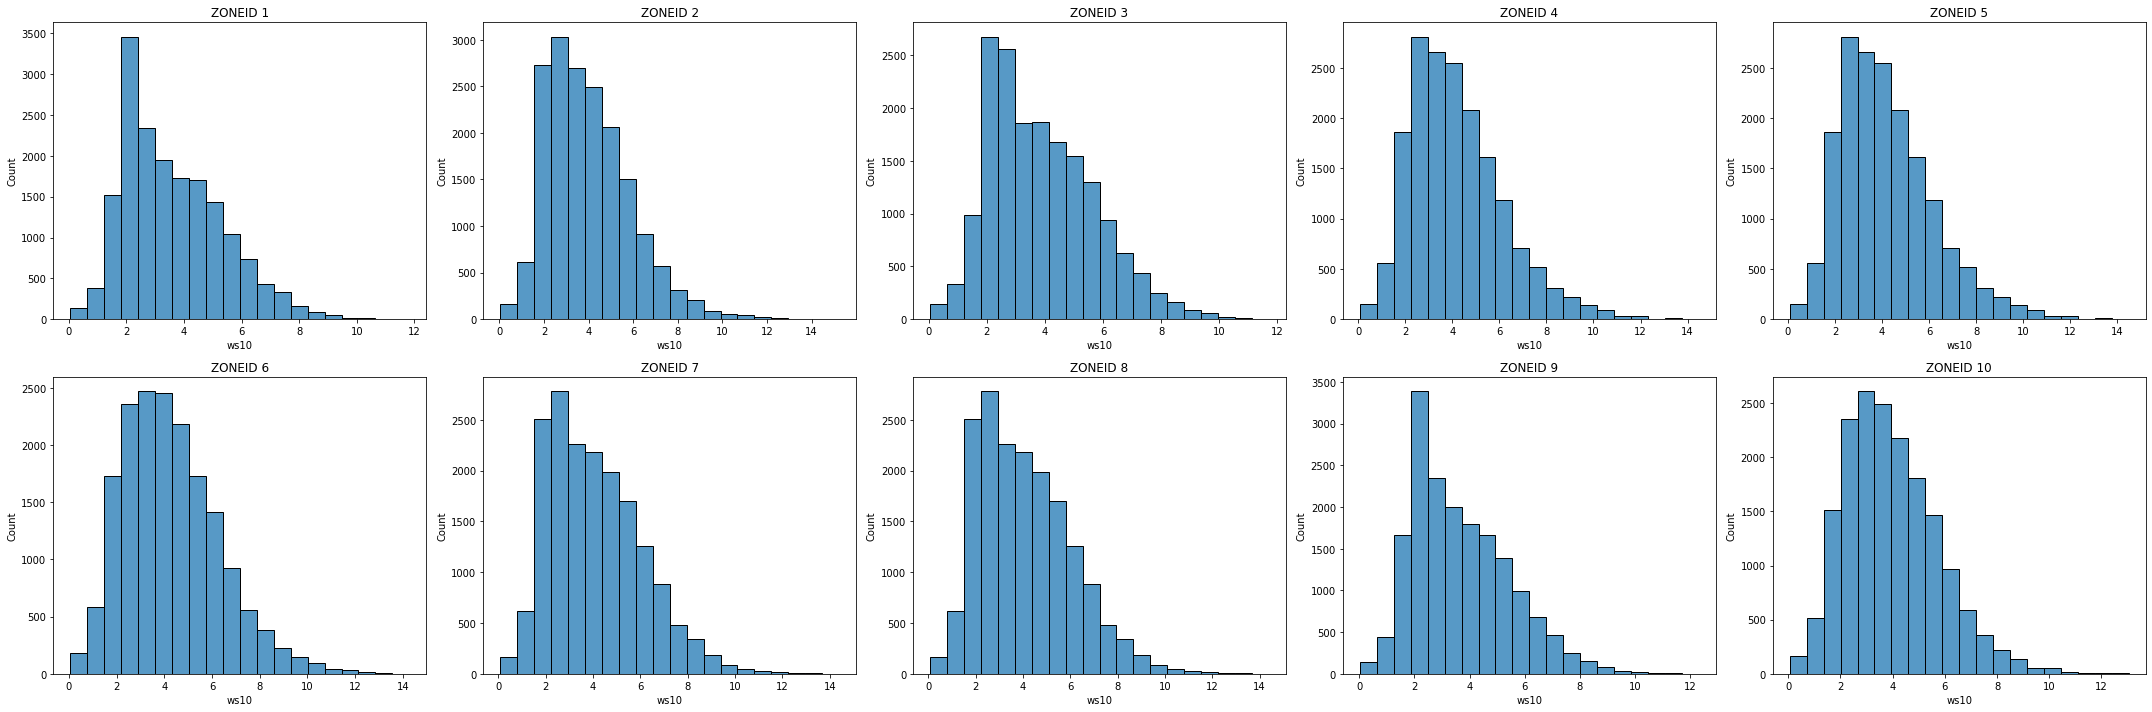

In [9]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10))

axs = axs.ravel()

for zone in zones:
    sns.histplot(data = df[df['ZONEID'] == zone], x = 'ws10', bins = 20, ax = axs[zone - 1])
    axs[zone - 1].set_title('ZONEID {}'.format(zone))

fig.tight_layout()

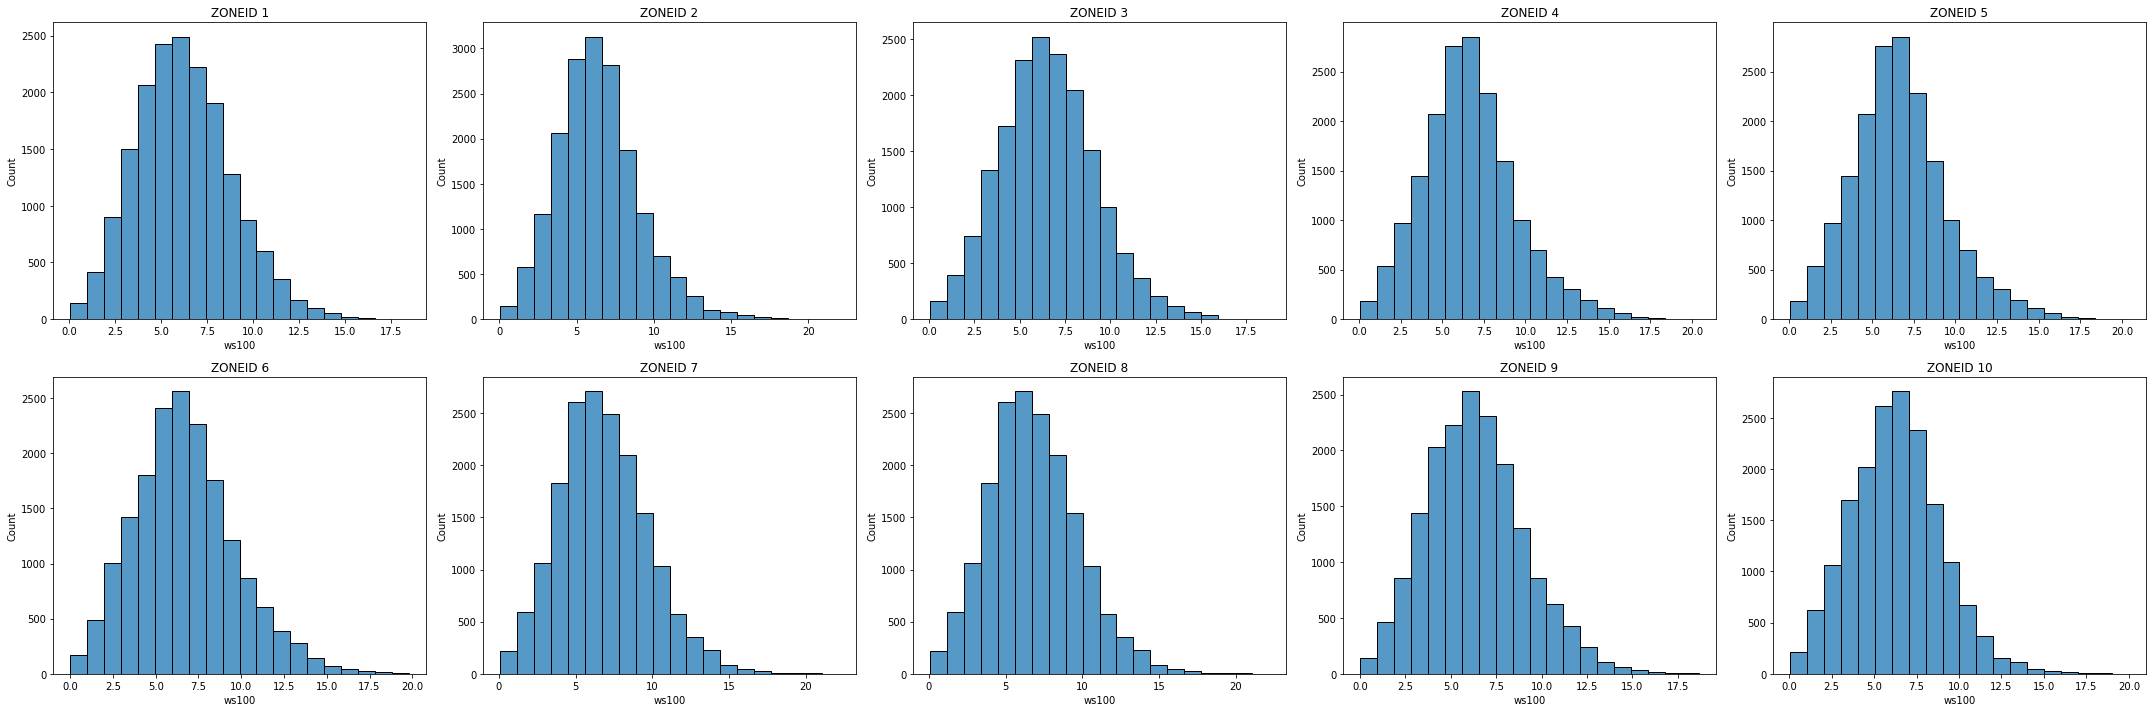

In [10]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10))

axs = axs.ravel()

for zone in zones:
    sns.histplot(data = df[df['ZONEID'] == zone], x = 'ws100', bins = 20, ax = axs[zone - 1])
    axs[zone - 1].set_title('ZONEID {}'.format(zone))

fig.tight_layout()

<AxesSubplot:xlabel='ws100', ylabel='Count'>

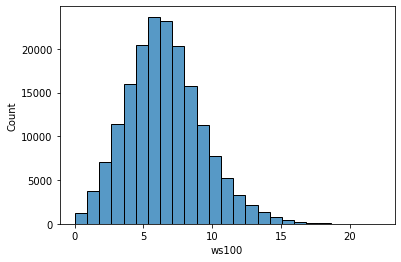

In [11]:
sns.histplot(data = df, x = 'ws100', bins = 25)

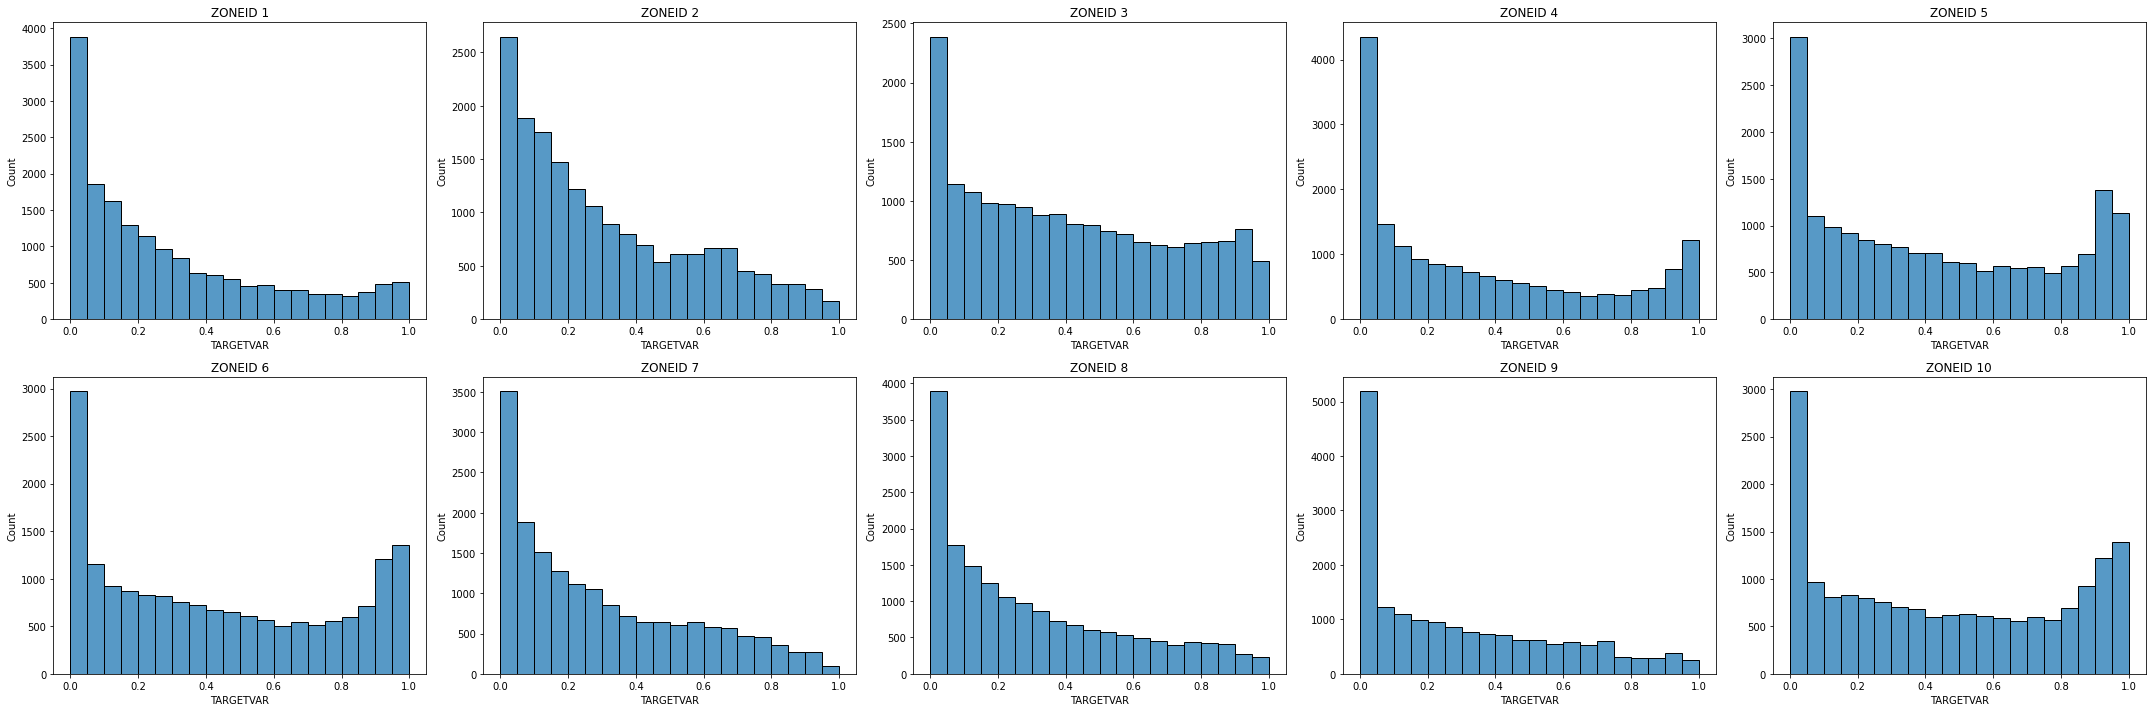

In [12]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10))

axs = axs.ravel()

for zone in zones:
    sns.histplot(data = df[df['ZONEID'] == zone], x = 'TARGETVAR', bins = 20, ax = axs[zone - 1])
    axs[zone - 1].set_title('ZONEID {}'.format(zone))

fig.tight_layout()

## Analysis by time

In [13]:
df['HOUR'] = df.TIMESTAMP.dt.hour
df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,ws10,ws100,wd10,wd100,wd100_card,wd10_card,HOUR
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,3.421530,4.652334,322.0,322.0,NW,NW,1
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,3.096451,4.154892,305.0,306.0,NW,NW,2
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,2.795932,3.712577,287.0,289.0,WNW,WNW,3
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,2.461699,3.234831,273.0,276.0,W,W,4
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,2.279435,2.976332,260.0,264.0,W,W,5


In [14]:
df['MONTH'] = df.TIMESTAMP.dt.month
df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,ws10,ws100,wd10,wd100,wd100_card,wd10_card,HOUR,MONTH
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,3.421530,4.652334,322.0,322.0,NW,NW,1,1
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,3.096451,4.154892,305.0,306.0,NW,NW,2,1
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,2.795932,3.712577,287.0,289.0,WNW,WNW,3,1
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,2.461699,3.234831,273.0,276.0,W,W,4,1
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,2.279435,2.976332,260.0,264.0,W,W,5,1


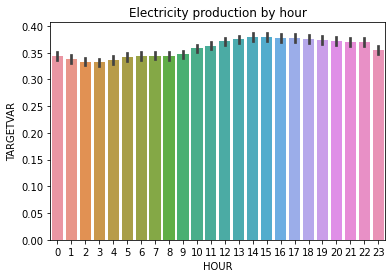

In [15]:
sns.barplot(data = df, x = 'HOUR', y = 'TARGETVAR')
plt.title('Electricity production by hour')
plt.show()

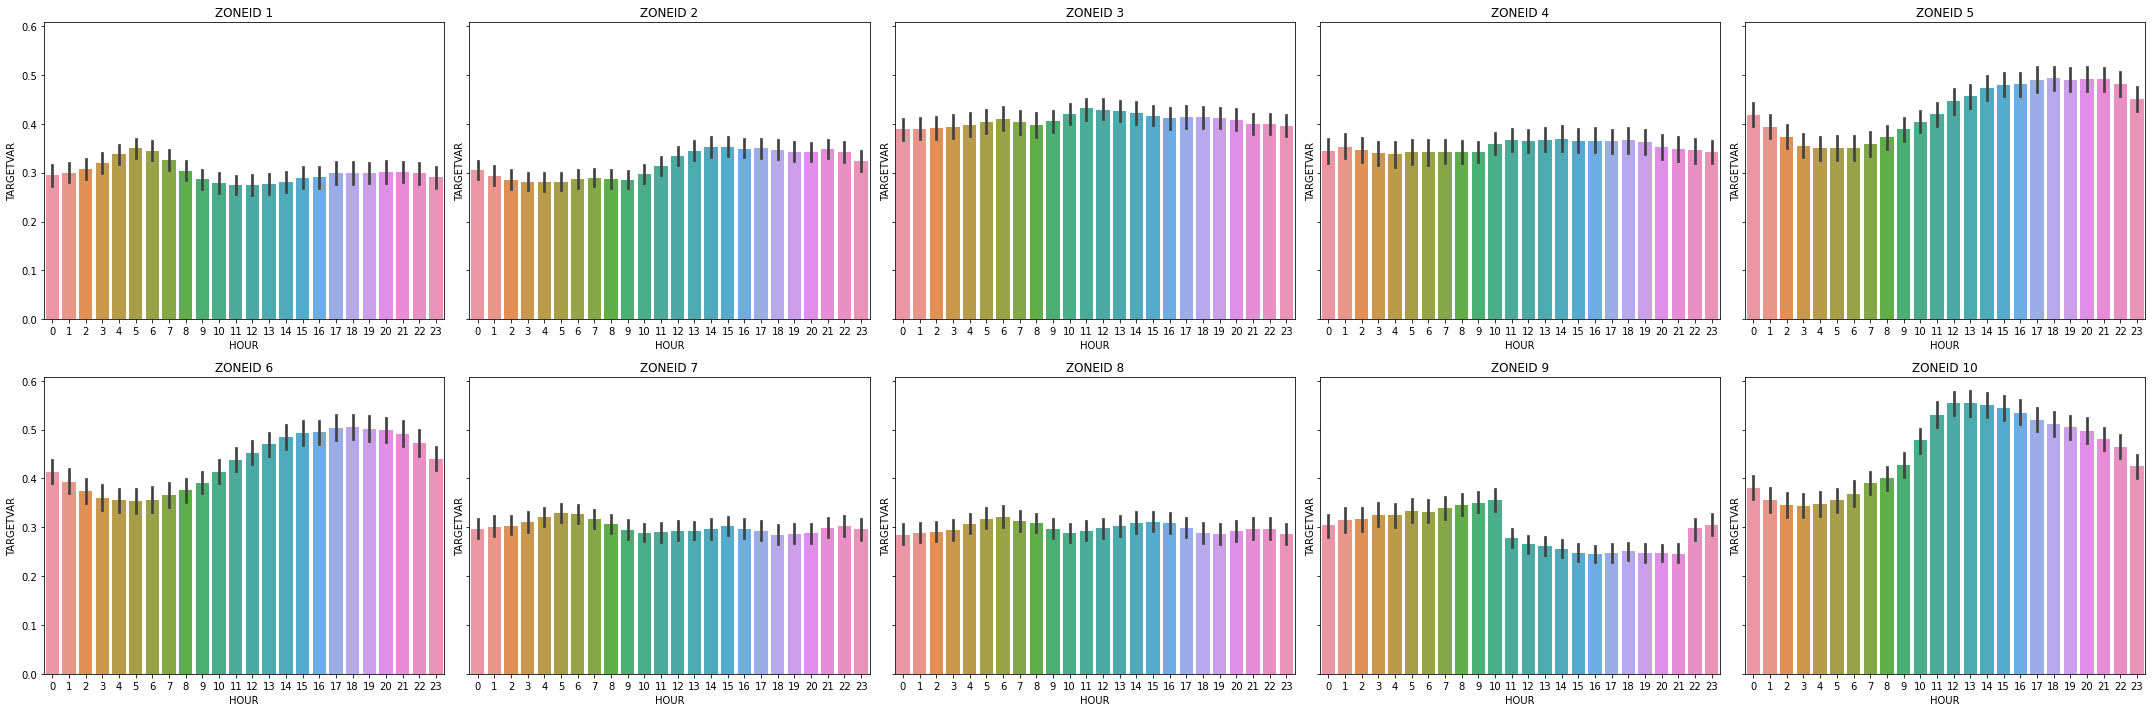

In [16]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10), sharey = True)

axs = axs.ravel()

for zone in zones:
    gb = df[df['ZONEID'] == zone].groupby(by = ['HOUR']).mean()
    sns.barplot(data = df[df['ZONEID'] == zone], x = 'HOUR', y = 'TARGETVAR', ax = axs[zone - 1])
    axs[zone - 1].set_title('ZONEID {}'.format(zone))

fig.tight_layout()

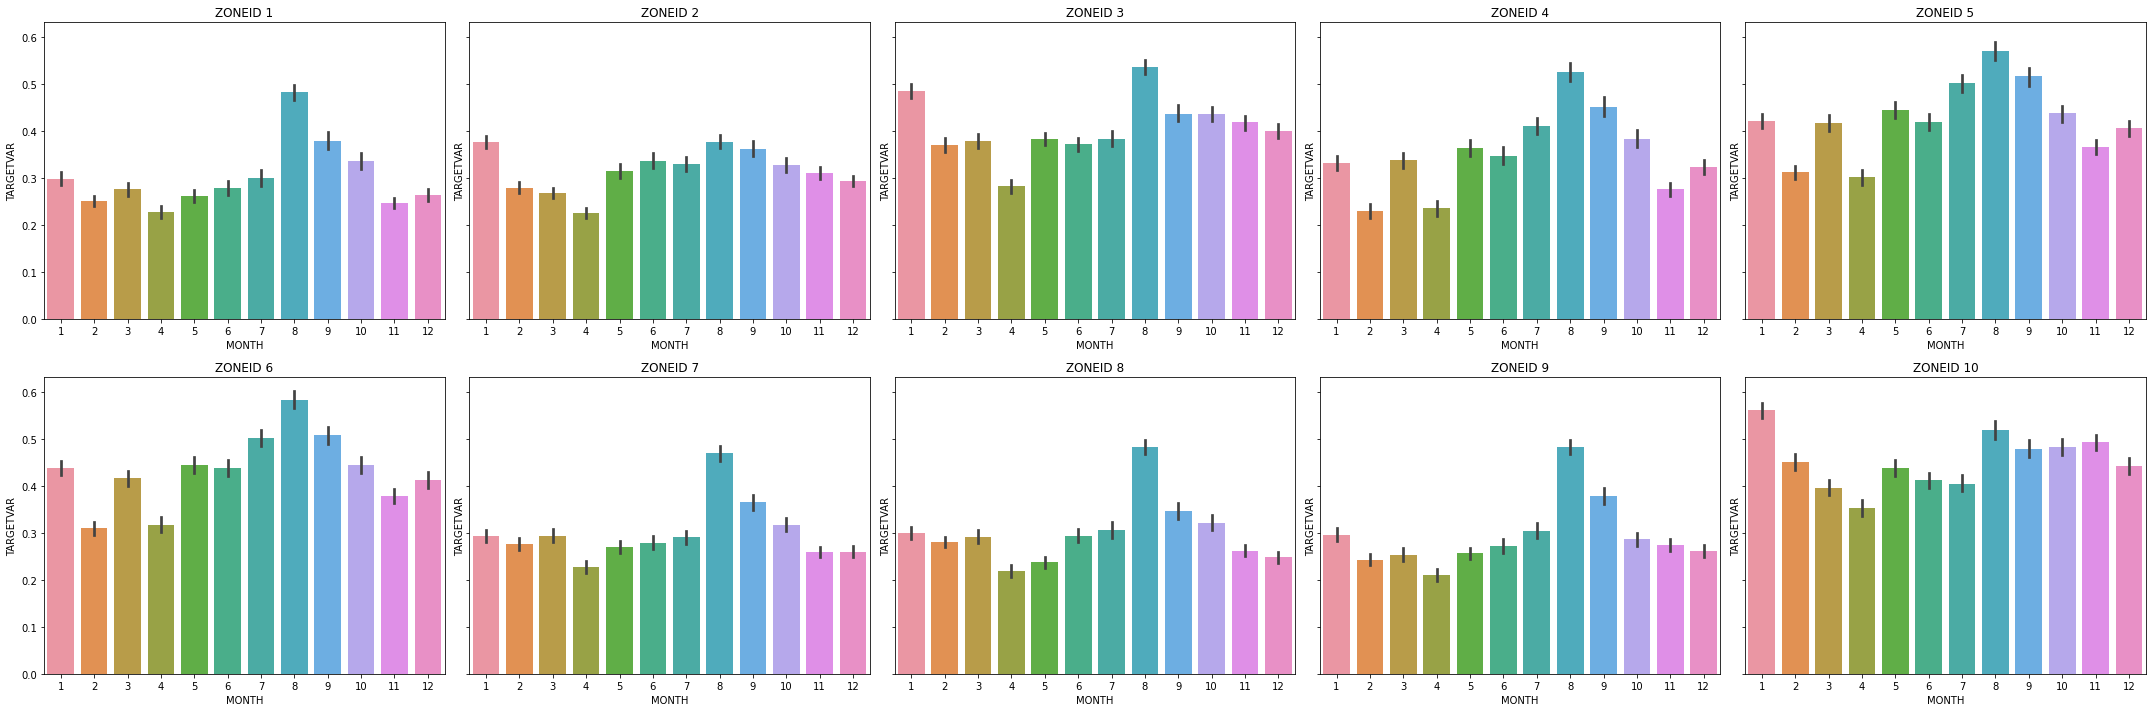

In [17]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10), sharey = True)

axs = axs.ravel()

for zone in zones:
    sns.barplot(data = df[df['ZONEID'] == zone], x = 'MONTH', y = 'TARGETVAR', ax = axs[zone - 1])
    axs[zone - 1].set_title('ZONEID {}'.format(zone))

fig.tight_layout()

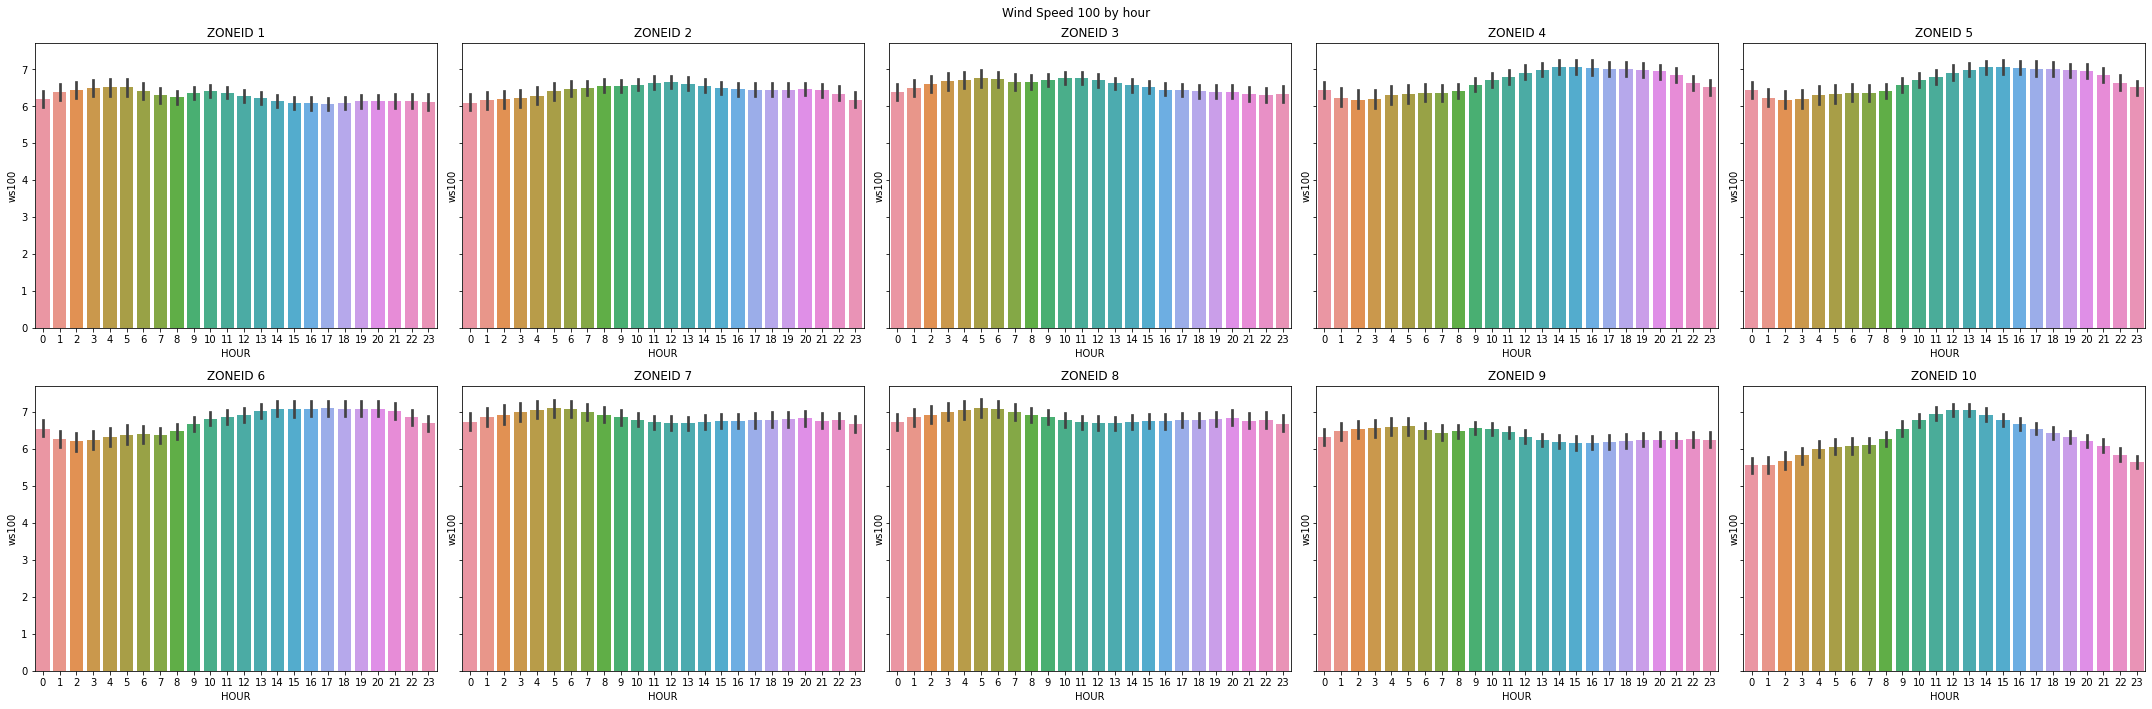

In [18]:
zones = df.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10), sharey = True)

axs = axs.ravel()

for zone in zones:
    sns.barplot(data = df[df['ZONEID'] == zone], x = 'HOUR', y = 'ws100', ax = axs[zone - 1])
    axs[zone - 1].set_title('ZONEID {}'.format(zone))
    
fig.suptitle('Wind Speed 100 by hour')

fig.tight_layout()

<AxesSubplot:xlabel='HOUR', ylabel='ws100'>

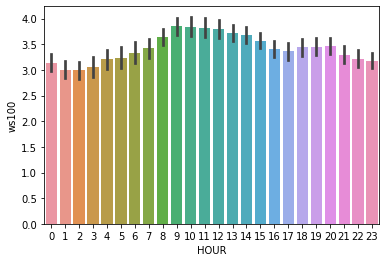

In [19]:
df_zero = df[df.TARGETVAR == 0 | df.TARGETVAR.isna()]
df_zero
sns.barplot(data = df_zero, x = 'HOUR', y = 'ws100')

In [20]:
df['wd10_rd'] = (df.wd10 // 5) * 5
df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,ws10,ws100,wd10,wd100,wd100_card,wd10_card,HOUR,MONTH,wd10_rd
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,3.421530,4.652334,322.0,322.0,NW,NW,1,1,320.0
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,3.096451,4.154892,305.0,306.0,NW,NW,2,1,305.0
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,2.795932,3.712577,287.0,289.0,WNW,WNW,3,1,285.0
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,2.461699,3.234831,273.0,276.0,W,W,4,1,270.0
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,2.279435,2.976332,260.0,264.0,W,W,5,1,260.0


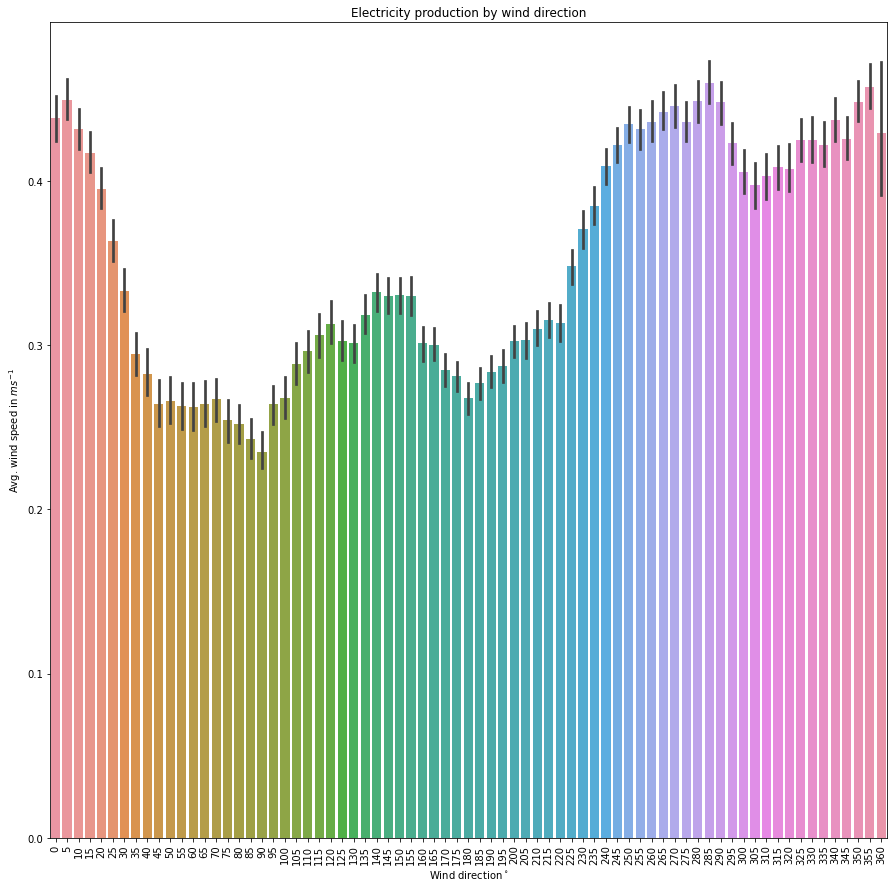

In [21]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.barplot(data = df, x = 'wd10_rd', y = 'TARGETVAR', ax = ax)
ax.set_xticklabels([int(x) for x in sorted(df.wd10_rd.unique())])
plt.xlabel('Wind direction' + r'$^\circ$')
plt.ylabel('Avg. wind speed in '+ r'$ms^{-1}$')
plt.xticks(rotation=90)
plt.title('Electricity production by wind direction')
plt.show()

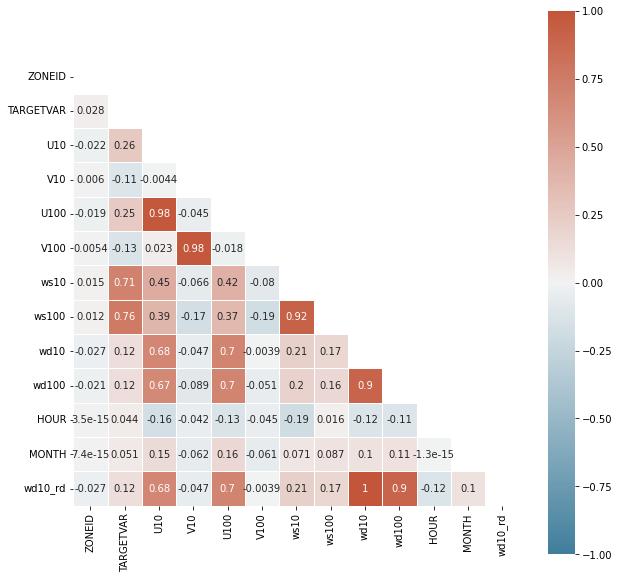

In [22]:
fig, ax = plt.subplots(figsize= (10,10))
cmap = sns.diverging_palette(230,20, as_cmap=True)
ax = sns.heatmap( df.corr(), mask = np.triu(np.ones_like(df.corr(), dtype = bool)),cmap = cmap, vmin = -1, vmax= 1, center = 0, annot = True, square = True, linewidths= .5)

<AxesSubplot:xlabel='ws10', ylabel='TARGETVAR'>

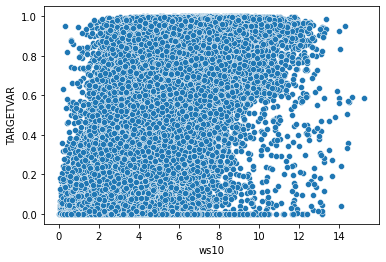

In [23]:
sns.scatterplot(x = 'ws10', y = 'TARGETVAR', data = df)

In [24]:
df_zero

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,ws10,ws100,wd10,wd100,wd100_card,wd10_card,HOUR,MONTH
0,1,2012-01-01 01:00:00,0.0,2.124600,-2.681966,2.864280,-3.666076,3.421530,4.652334,322.0,322.0,NW,NW,1,1
39,1,2012-01-02 16:00:00,0.0,-1.045900,1.512180,-0.978732,2.513280,1.838639,2.697127,145.0,159.0,SSE,SE,16,1
40,1,2012-01-02 17:00:00,0.0,-1.178455,1.414489,-1.011886,2.550219,1.841069,2.743635,140.0,158.0,SSE,SE,17,1
41,1,2012-01-02 18:00:00,0.0,-1.724081,1.156517,-1.658402,2.629451,2.076051,3.108747,124.0,148.0,SSE,ESE,18,1
42,1,2012-01-02 19:00:00,0.0,-1.746782,0.686247,-1.841271,2.091423,1.876748,2.786455,111.0,139.0,SE,ESE,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175393,10,2013-12-30 02:00:00,0.0,1.713923,-0.597229,2.062536,-0.692053,1.814997,2.175544,289.0,289.0,WNW,WNW,2,12
175394,10,2013-12-30 03:00:00,0.0,2.018486,-0.193611,2.395452,-0.151059,2.027750,2.400210,275.0,274.0,W,W,3,12
175423,10,2013-12-31 08:00:00,0.0,-0.325476,-0.528670,-0.395519,-0.646767,0.620828,0.758119,32.0,31.0,NNE,NNE,8,12
175424,10,2013-12-31 09:00:00,0.0,-0.720339,-0.593653,-1.503379,-1.269683,0.933441,1.967802,51.0,50.0,NE,NE,9,12


<AxesSubplot:xlabel='MONTH', ylabel='count'>

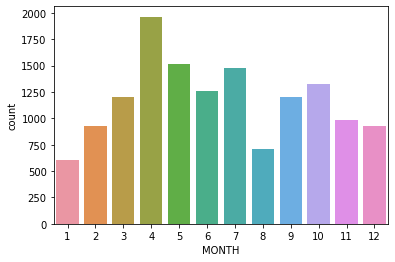

In [25]:
sns.countplot(data = df_zero, x = 'MONTH')

In [26]:
df_zero['ws100_rd'] = round(df_zero.ws100, 1) 
df_zero.head()

/var/folders/5s/ttk3kqj57393ypp_kk73z2d80000gn/T/ipykernel_94298/2935414869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zero['ws100_rd'] = round(df_zero.ws100, 1)


,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,ws10,ws100,wd10,wd100,wd100_card,wd10_card,HOUR,MONTH,ws100_rd
0,1,2012-01-01 01:00:00,0.0,2.124600,-2.681966,2.864280,-3.666076,3.421530,4.652334,322.0,322.0,NW,NW,1,1,4.7
39,1,2012-01-02 16:00:00,0.0,-1.045900,1.512180,-0.978732,2.513280,1.838639,2.697127,145.0,159.0,SSE,SE,16,1,2.7
40,1,2012-01-02 17:00:00,0.0,-1.178455,1.414489,-1.011886,2.550219,1.841069,2.743635,140.0,158.0,SSE,SE,17,1,2.7
41,1,2012-01-02 18:00:00,0.0,-1.724081,1.156517,-1.658402,2.629451,2.076051,3.108747,124.0,148.0,SSE,ESE,18,1,3.1
42,1,2012-01-02 19:00:00,0.0,-1.746782,0.686247,-1.841271,2.091423,1.876748,2.786455,111.0,139.0,SE,ESE,19,1,2.8


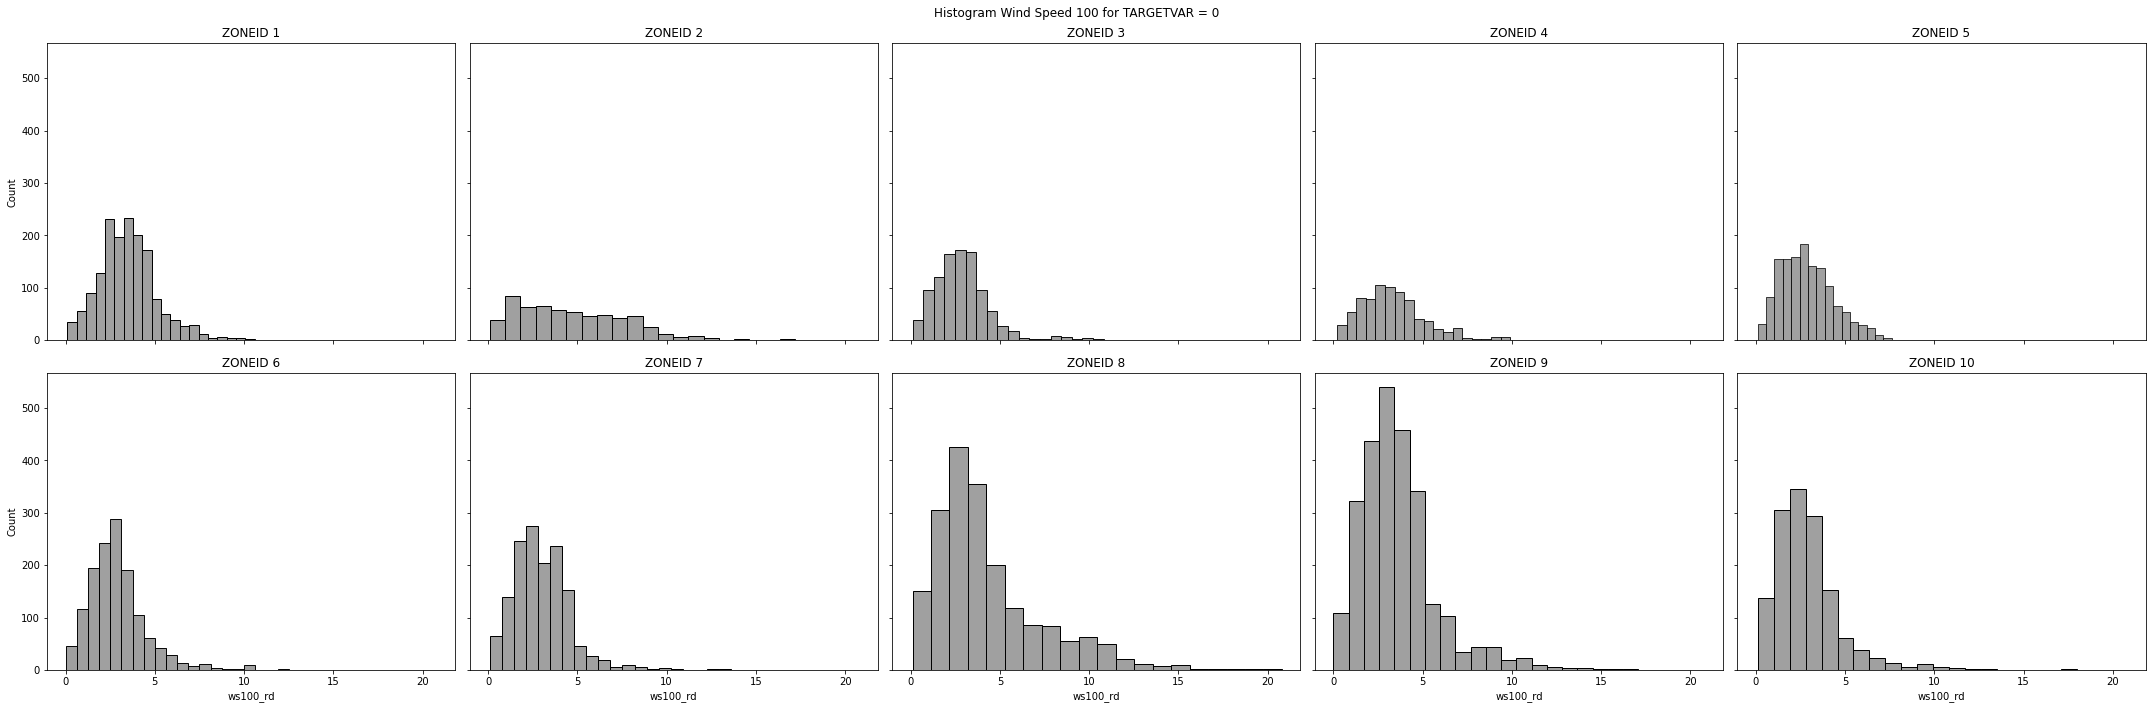

In [27]:
zones = df_zero.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10), sharey = True, sharex = True)

axs = axs.ravel()

for zone in zones:
    sns.histplot(data = df_zero[df_zero['ZONEID'] == zone], x = 'ws100_rd', ax = axs[zone - 1], color= "gray", bins = 20)
    axs[zone - 1].set_title('ZONEID '+ str(zone))
    
fig.suptitle('Histogram Wind Speed 100 for TARGETVAR = 0')

fig.tight_layout()

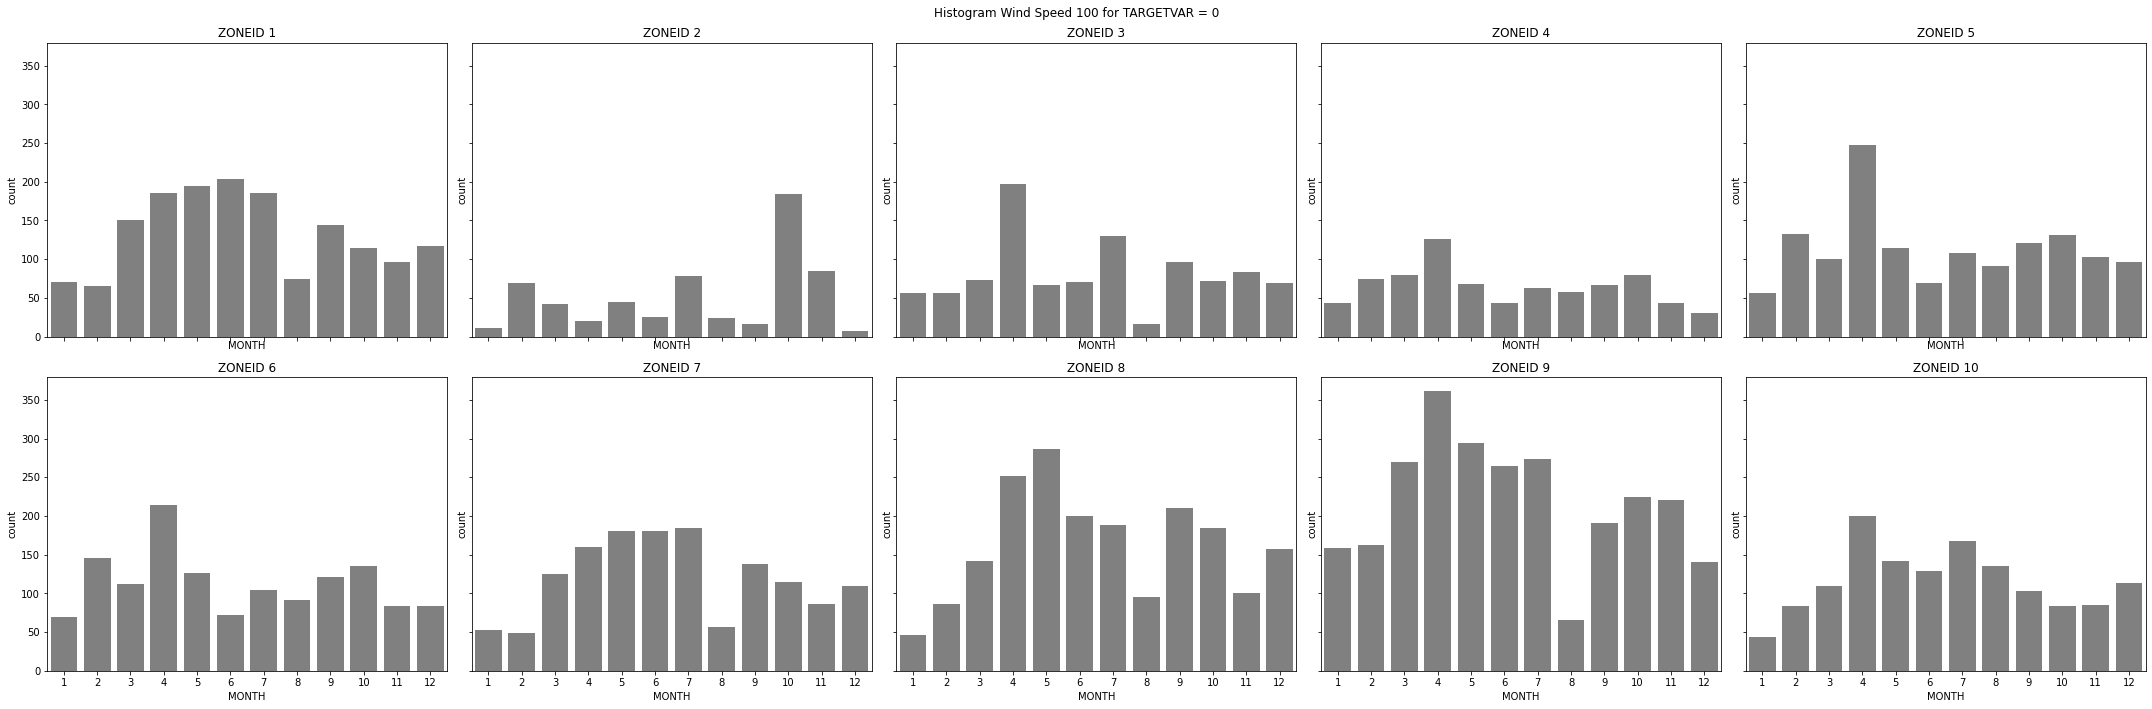

In [28]:
zones = df_zero.ZONEID.unique()

fig, axs = plt.subplots(2,5,figsize = (30, 10), sharey = True, sharex = True)

axs = axs.ravel()

for zone in zones:
    sns.countplot(data = df_zero[df_zero['ZONEID'] == zone], x = 'MONTH', ax = axs[zone - 1], color= "gray")
    axs[zone - 1].set_title('ZONEID '+ str(zone))
    
fig.suptitle('Histogram Wind Speed 100 for TARGETVAR = 0')

fig.tight_layout()

In [30]:
df['zero'] = (df['TARGETVAR'] == 0) * 1
df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,ws10,ws100,wd10,wd100,wd100_card,wd10_card,HOUR,MONTH,wd10_rd,zero
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,3.421530,4.652334,322.0,322.0,NW,NW,1,1,320.0,1
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,3.096451,4.154892,305.0,306.0,NW,NW,2,1,305.0,0
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,2.795932,3.712577,287.0,289.0,WNW,WNW,3,1,285.0,0
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,2.461699,3.234831,273.0,276.0,W,W,4,1,270.0,0
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,2.279435,2.976332,260.0,264.0,W,W,5,1,260.0,0


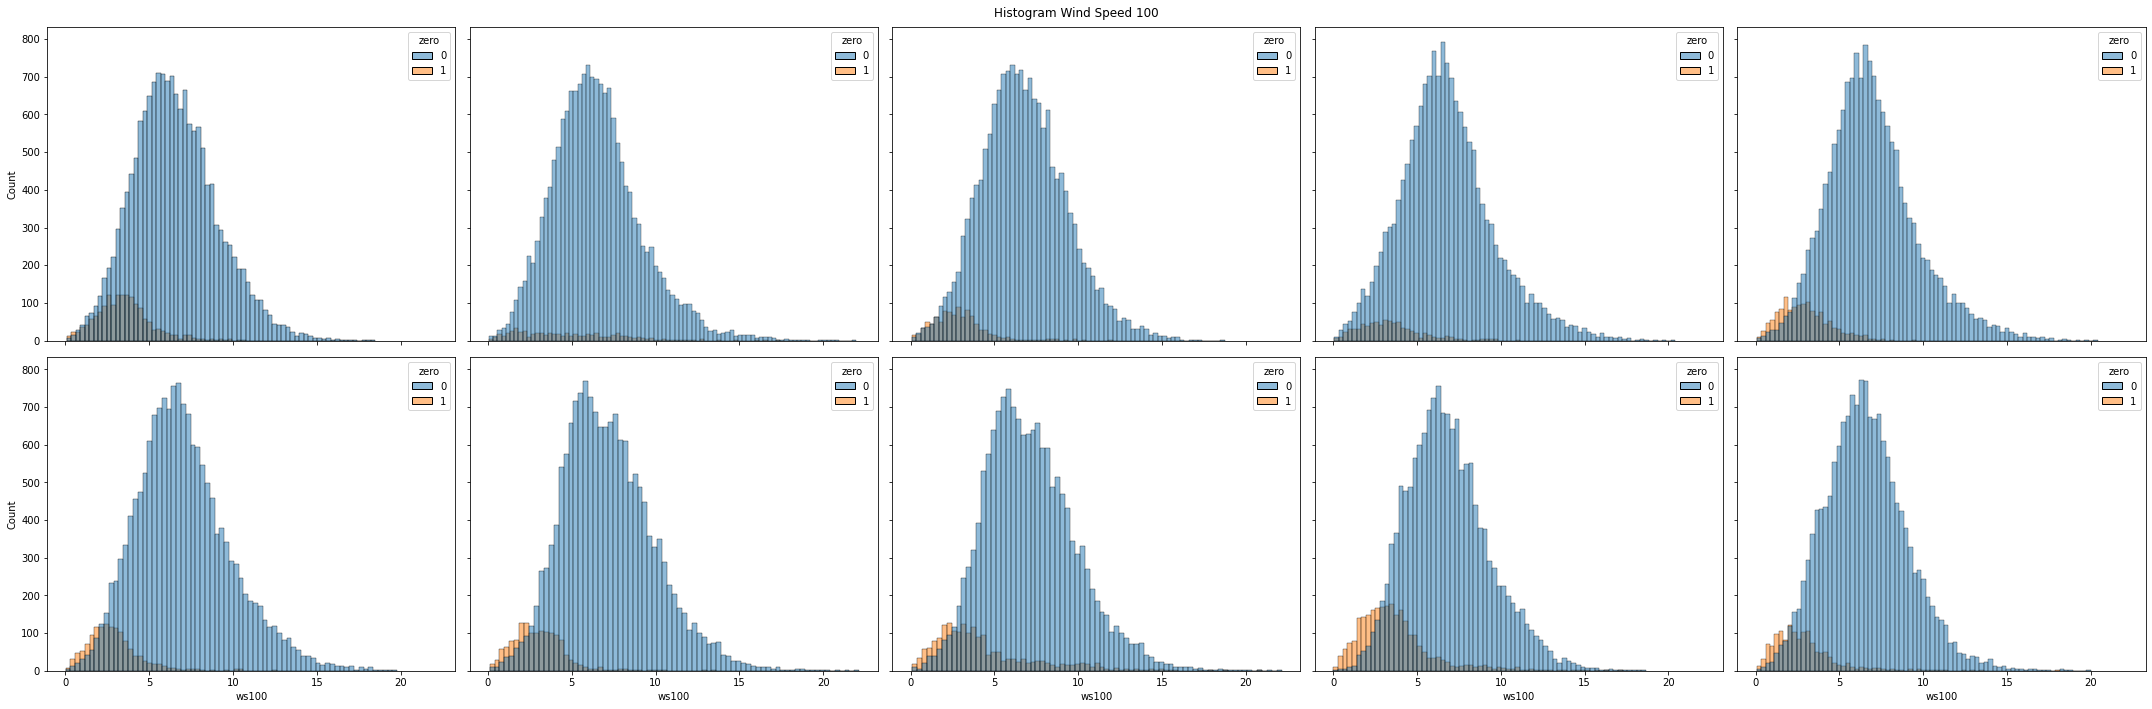

In [32]:
zones = df.ZONEID.unique()
fig, axs = plt.subplots(2,5,figsize = (30, 10), sharey = True, sharex = True)
axs = axs.ravel()

for zone in zones:
    sns.histplot(data = df[df['ZONEID'] == zone], x = 'ws100', hue = 'zero', ax = axs[zone - 1])
    
    
fig.suptitle('Histogram Wind Speed 100')

fig.tight_layout()

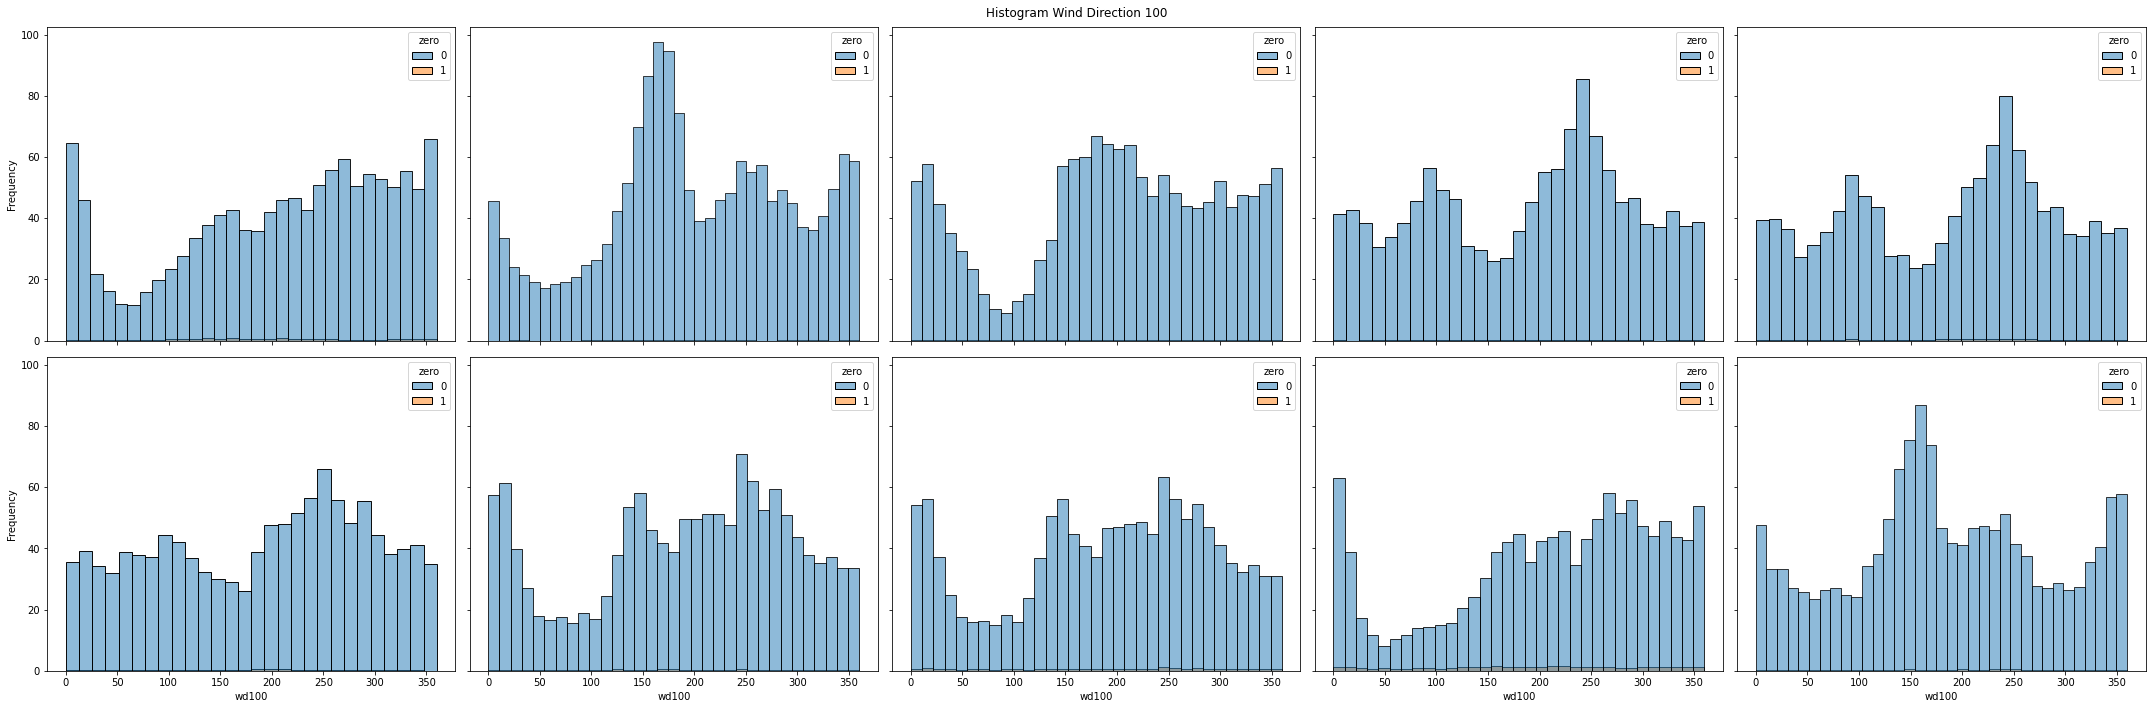

In [64]:
zones = df.ZONEID.unique()
fig, axs = plt.subplots(2,5,figsize = (30, 10), sharey = True, sharex = True)
axs = axs.ravel()

for zone in zones:
    sns.histplot(data = df[df['ZONEID'] == zone], x = 'wd100', hue = 'zero', ax = axs[zone - 1], stat = 'frequency')
    
    
fig.suptitle('Histogram Wind Direction 100')

fig.tight_layout()

In [34]:
df.describe()

,ZONEID,TARGETVAR,U10,V10,U100,V100,ws10,ws100,wd10,wd100,HOUR,MONTH,wd10_rd,zero
count,175440.00000,175265.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000,175440.000000
mean,5.50000,0.358588,0.818499,0.120835,1.272769,0.058513,3.988859,6.565405,191.153796,193.597042,11.500000,6.519836,189.152702,0.080415
std,2.87229,0.310085,3.031781,3.105553,4.816235,5.096587,1.899898,2.773068,100.802619,100.445884,6.922206,3.449561,100.810237,0.271935
min,1.00000,0.000000,-8.371644,-12.923576,-12.425352,-19.791997,0.023234,0.012818,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.00000,0.080344,-1.498648,-2.116981,-2.404248,-3.768786,2.486958,4.657228,114.000000,121.000000,5.750000,4.000000,110.000000,0.000000
50%,5.50000,0.278670,0.548880,0.410020,1.053103,0.785671,3.706721,6.370377,200.000000,204.000000,11.500000,7.000000,200.000000,0.000000
75%,8.00000,0.602033,2.805379,2.364026,4.734727,4.091509,5.162363,8.216829,272.000000,274.000000,17.250000,10.000000,270.000000,0.000000
max,10.00000,1.000000,14.837177,11.401396,21.399071,16.304799,15.233722,22.155522,360.000000,360.000000,23.000000,12.000000,360.000000,1.000000


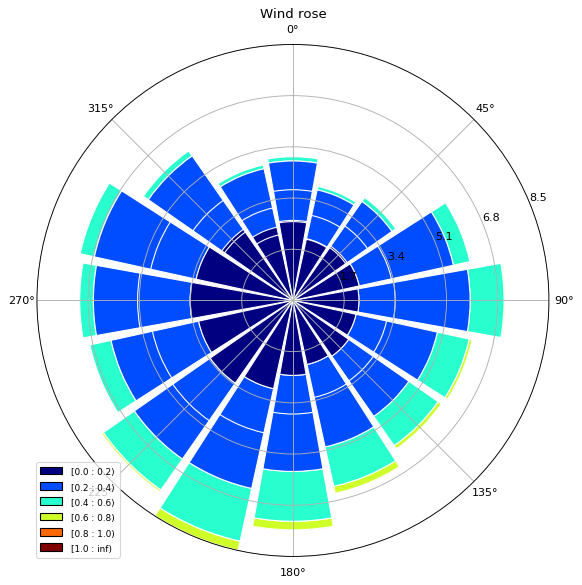

In [86]:
# Create windrose plot
ax = wr.WindroseAxes.from_ax()
ax.bar(df.wd10, df.ws10, normed = True, opening = 0.9, edgecolor = 'white')
ax.bar(df.wd10, df.TARGETVAR, normed = True, opening = 0.9, edgecolor = 'white')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_legend()
ax.set_title('Wind rose')
plt.show()

In [36]:
mean_ws = df.groupby(by= 'wd10').mean().ws10

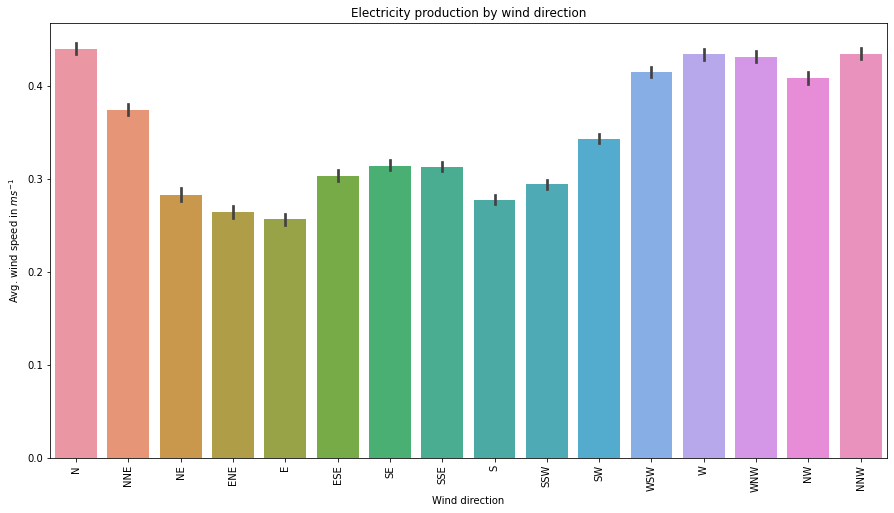

In [66]:
fig, ax = plt.subplots(figsize = (15, 8))
sns.barplot(data = df, 
            x = 'wd100_card', 
            y = 'TARGETVAR', 
            ax = ax, 
            order = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
                    "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"])
plt.xlabel('Wind direction')
plt.ylabel('Avg. wind speed in '+ r'$ms^{-1}$')
plt.xticks(rotation=90)
plt.title('Electricity production by wind direction')
plt.show()

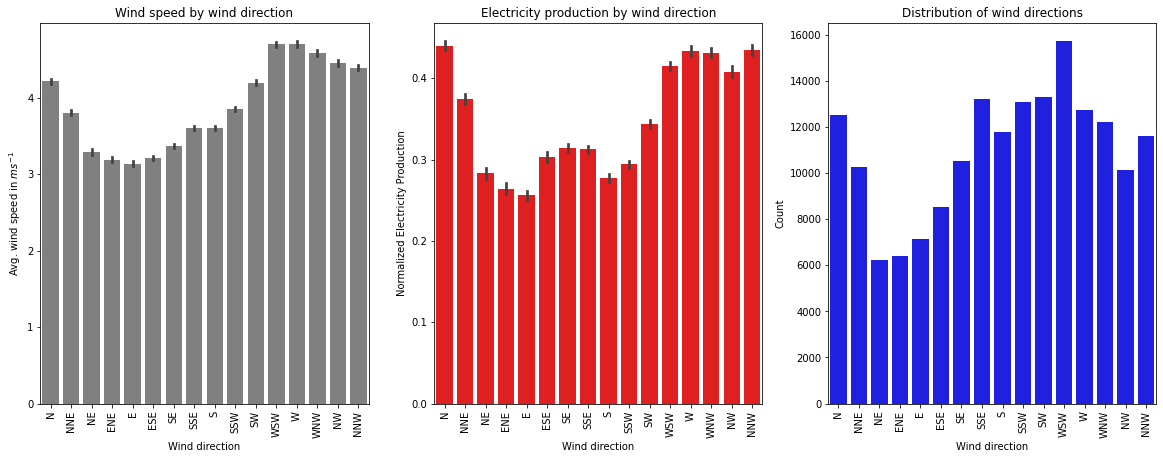

In [67]:
fig, ax = plt.subplots(1,3,figsize = (20, 7))
sns.barplot(data = df, 
            x = 'wd100_card', 
            y = 'ws10', 
            ax = ax[0], 
            color = 'gray',
            order = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
                    "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"])
ax[0].set_xlabel('Wind direction')
ax[0].set_ylabel('Avg. wind speed in '+ r'$ms^{-1}$')
ax[0].set_title('Wind speed by wind direction')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.barplot(data = df, 
            x = 'wd100_card', 
            y = 'TARGETVAR', 
            ax = ax[1], 
            color='red',
            order = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
                    "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"])
ax[1].set_xlabel('Wind direction')
ax[1].set_ylabel('Normalized Electricity Production')
ax[1].set_title('Electricity production by wind direction')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)

sns.countplot(data = df, 
            x = 'wd100_card', 
            ax = ax[2], 
            color='blue',
            order = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
                    "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"])
ax[2].set_xlabel('Wind direction')
ax[2].set_ylabel('Count')
ax[2].set_title('Distribution of wind directions')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)

plt.show()

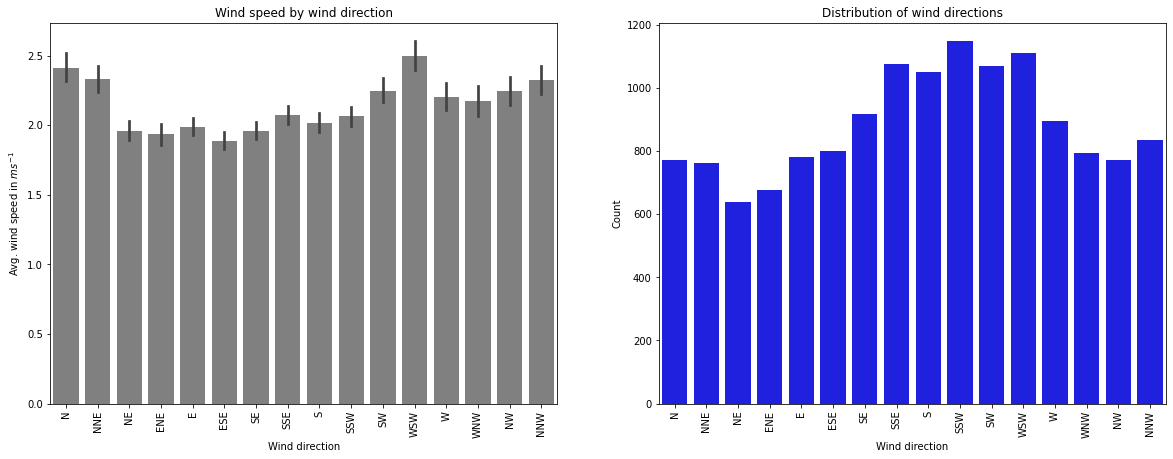

In [68]:
fig, ax = plt.subplots(1,2,figsize = (20, 7))
sns.barplot(data = df_zero, 
            x = 'wd100_card', 
            y = 'ws10', 
            ax = ax[0], 
            color = 'gray',
            order = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
                    "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"])
ax[0].set_xlabel('Wind direction')
ax[0].set_ylabel('Avg. wind speed in '+ r'$ms^{-1}$')
ax[0].set_title('Wind speed by wind direction')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

sns.countplot(data = df_zero, 
            x = 'wd100_card', 
            ax = ax[1], 
            color='blue',
            order = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
                    "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"])
ax[1].set_xlabel('Wind direction')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of wind directions')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90 )

plt.show()

[Text(0, 0, 'N'),
 Text(1, 0, 'NNE'),
 Text(2, 0, 'NE'),
 Text(3, 0, 'ENE'),
 Text(4, 0, 'E'),
 Text(5, 0, 'ESE'),
 Text(6, 0, 'SE'),
 Text(7, 0, 'SSE'),
 Text(8, 0, 'S'),
 Text(9, 0, 'SSW'),
 Text(10, 0, 'SW'),
 Text(11, 0, 'WSW'),
 Text(12, 0, 'W'),
 Text(13, 0, 'WNW'),
 Text(14, 0, 'NW'),
 Text(15, 0, 'NNW')]

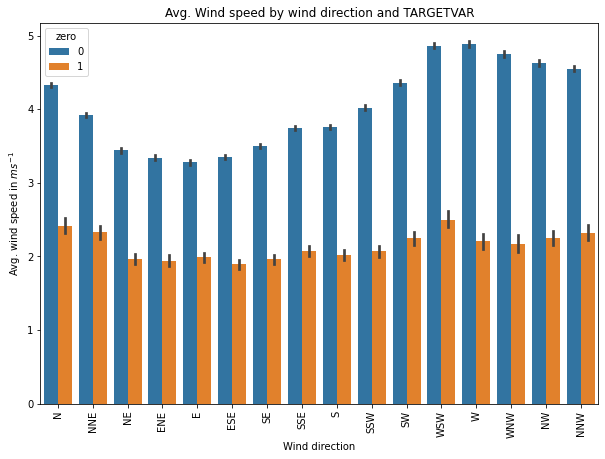

In [69]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.barplot(data = df, 
            x = 'wd100_card', 
            y = 'ws10', 
            ax = ax, 
            hue = 'zero',
            order = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
                    "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"])
ax.set_xlabel('Wind direction')
ax.set_ylabel('Avg. wind speed in '+ r'$ms^{-1}$')
ax.set_title('Avg. Wind speed by wind direction and TARGETVAR')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[]

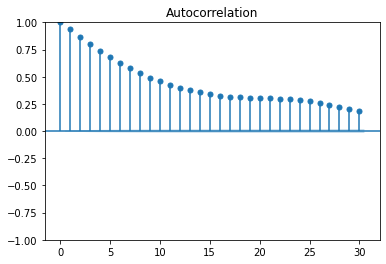

In [96]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.TARGETVAR, lags = 30, alpha = 0.05, use_vlines=True)
plt.plot()

/Users/msp/neuefische/Capstone_WindPowerPredicting/.venv/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


[]

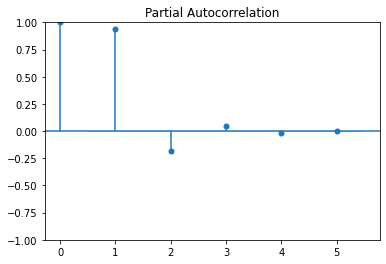

In [85]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df.TARGETVAR, lags = 5, alpha = 0.05, use_vlines=True)
plt.plot()

In [107]:
df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,ws10,ws100,wd10,wd100,wd100_card,wd10_card,HOUR,MONTH,wd10_rd,zero,ws100_rd
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,3.421530,4.652334,322.0,322.0,NW,NW,1,1,320.0,1,4.0
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,3.096451,4.154892,305.0,306.0,NW,NW,2,1,305.0,0,4.0
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,2.795932,3.712577,287.0,289.0,WNW,WNW,3,1,285.0,0,4.0
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,2.461699,3.234831,273.0,276.0,W,W,4,1,270.0,0,4.0
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,2.279435,2.976332,260.0,264.0,W,W,5,1,260.0,0,2.0


In [109]:
df['is_weekday'] = df.TIMESTAMP.dt.weekday

def is_weekday(weekday):
    if weekday in [5,6]:
        return 0
    else: 
        return 1

df.is_weekday = df.is_weekday.apply(lambda x: is_weekday(x))

df.head()

,ZONEID,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,ws10,ws100,wd10,wd100,wd100_card,wd10_card,HOUR,MONTH,wd10_rd,zero,ws100_rd,is_weekday
0,1,2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,3.421530,4.652334,322.0,322.0,NW,NW,1,1,320.0,1,4.0,0
1,1,2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,3.096451,4.154892,305.0,306.0,NW,NW,2,1,305.0,0,4.0,0
2,1,2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,2.795932,3.712577,287.0,289.0,WNW,WNW,3,1,285.0,0,4.0,0
3,1,2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,2.461699,3.234831,273.0,276.0,W,W,4,1,270.0,0,4.0,0
4,1,2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,2.279435,2.976332,260.0,264.0,W,W,5,1,260.0,0,2.0,0


0.3644465215827359
0.34270165215717924
6.345131191717579%


<AxesSubplot:xlabel='is_weekday', ylabel='TARGETVAR'>

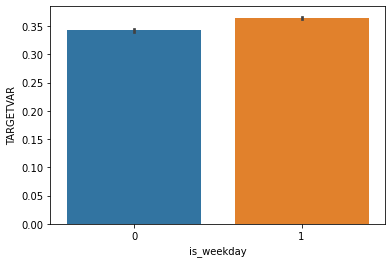

In [118]:
df_weekday = df[df.is_weekday == 1]
df_weekend = df[df.is_weekday == 0]

print(df_weekday.TARGETVAR.mean())
print(df_weekend.TARGETVAR.mean())

print(str((df_weekday.TARGETVAR.mean() / df_weekend.TARGETVAR.mean() - 1) * 100) + "%")

sns.barplot(data = df, x = 'is_weekday', y = 'TARGETVAR' )

In [113]:
from scipy.stats import ttest_ind

ttest_ind(df_weekday.TARGETVAR, df_weekend.TARGETVAR)

Ttest_indResult(statistic=13.275475108368592, pvalue=3.359224349065123e-40)

(0.3, 0.4)

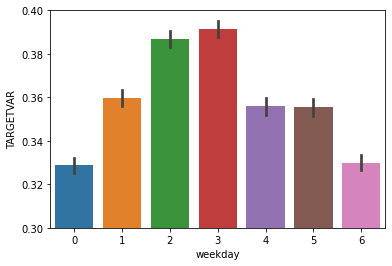

In [128]:
df['weekday'] = df.TIMESTAMP.dt.weekday

sns.barplot(data = df, x = 'weekday', y = 'TARGETVAR')
plt.ylim([0.3,0.4])

In [132]:
df.groupby(by = 'weekday').mean()['TARGETVAR'].max() / df.groupby(by = 'weekday').mean()['TARGETVAR'].min() - 1

0.1903321106430802

In [136]:
from sklearn.model_selection import train_test_split

X = pd.DataFrame(df.ws100)
y = df.TARGETVAR

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .75, random_state=42)

In [137]:
X_train

,ws100
35641,0.314641
6419,3.195149
171380,7.611572
156427,4.448997
141010,2.879158
...,...
119879,3.352624
103694,10.481218
131932,8.423953
146867,4.093662


In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mean_squared_error(y_test, y_pred, squared = False)



0.19949940458095716

In [140]:
y_pred

array([-0.02707863,  0.67523803,  0.06462571, ...,  1.07378344,
        0.30887195,  0.34026037])